,Time_of_Event,Car_ID,PET
0,00:00,1,1.10
1,00:00,2,-5.57
2,00:00,3,-3.57
3,00:00,4,-4.85
4,00:00,5,-4.63
...,...,...,...
4995,14:58,4996,-1.03
4996,14:59,4997,-3.46
4997,14:59,4998,-5.40
4998,14:59,4999,-0.27


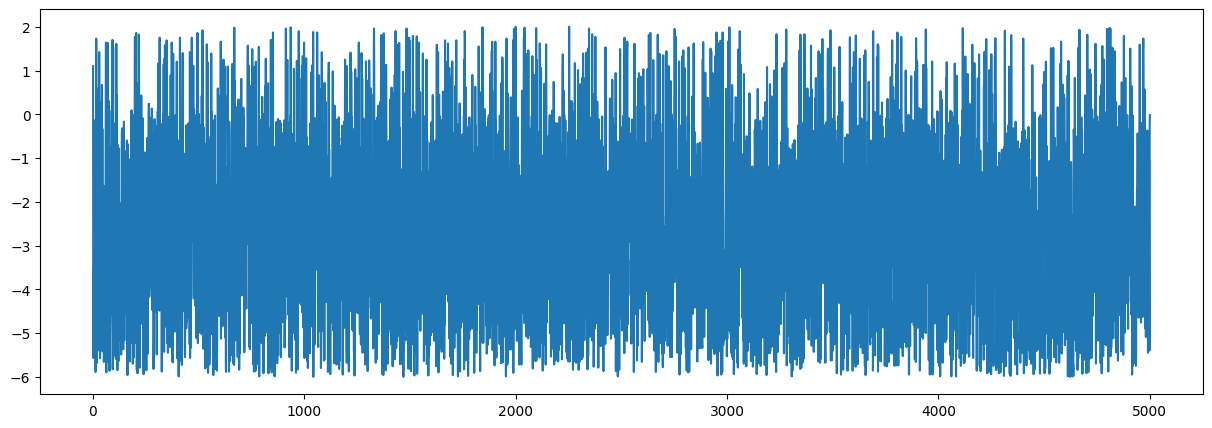

In [2]:
import pandas as pd
import pyextremes 
from matplotlib import pyplot as plt
import numpy as np

df=pd.read_csv("dataset/car_pet_data.csv").sort_values('Time_of_Event')
df['Car_ID'] = range(1, len(df) + 1)
df['PET'] = np.negative(df['PET'])
df = df.reset_index(drop=True)
df.head(20)
df.tail()
plt.figure(figsize=(15, 5))
plt.plot(df['Car_ID'],df['PET'])
df['Car_ID'].count()
df

BM=  50


(-10.0, 5.0)

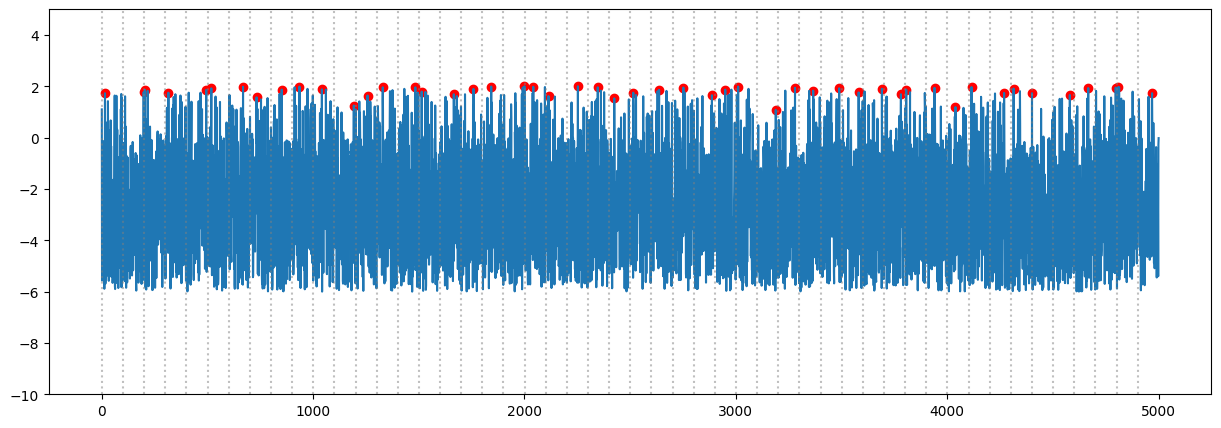

In [14]:

block_size = 100
block_groups = (df.index - df.index[0]) // block_size
max_indices = df.groupby(block_groups)['PET'].idxmax()
extremes = df.loc[max_indices]
print("BM= ",len(extremes))
plt.figure(figsize=(15, 5))
plt.plot(df['Car_ID'],df['PET'])
# plt.grid()
for i in range(0, len(df), block_size):
    plt.axvline(x=df['Car_ID'].iloc[i], color='gray', linestyle=':', alpha=0.5)
plt.scatter(extremes['Car_ID'],extremes['PET'],color='red')
plt.ylim(-10,5)


(array([1.08695652, 0.        , 0.        , 0.        , 0.        ,
        1.08695652, 0.        , 0.        , 0.        , 1.08695652,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 1.08695652,
        0.        , 1.08695652, 0.        , 0.        , 1.08695652,
        2.17391304, 1.08695652, 0.        , 2.17391304, 0.        ,
        4.34782609, 3.26086957, 1.08695652, 1.08695652, 0.        ,
        1.08695652, 0.        , 6.52173913, 1.08695652, 2.17391304,
        3.26086957, 3.26086957, 5.43478261, 4.34782609, 5.43478261]),
 array([1.08  , 1.0984, 1.1168, 1.1352, 1.1536, 1.172 , 1.1904, 1.2088,
        1.2272, 1.2456, 1.264 , 1.2824, 1.3008, 1.3192, 1.3376, 1.356 ,
        1.3744, 1.3928, 1.4112, 1.4296, 1.448 , 1.4664, 1.4848, 1.5032,
        1.5216, 1.54  , 1.5584, 1.5768, 1.5952, 1.6136, 1.632 , 1.6504,
        1.6688, 1.6872, 1.7056

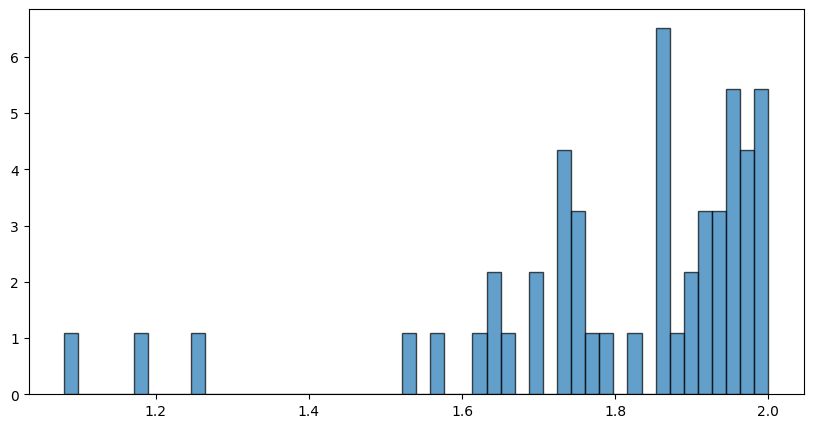

In [4]:
bs=50
plt.figure(figsize=(10, 5))
plt.hist(extremes['PET'], bins=bs, density=True,edgecolor='black', alpha=0.7)

50 50


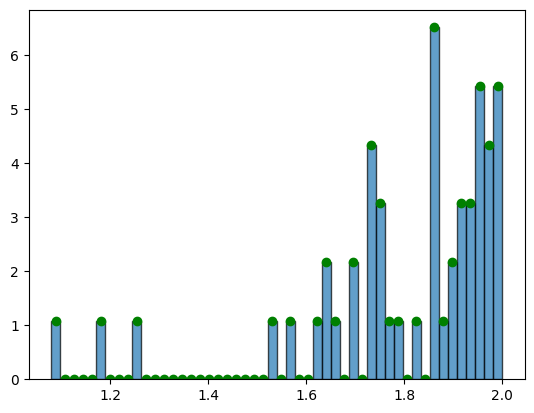

In [5]:
# print (extremes)
y_obser, bin_edges = np.histogram(extremes['PET'], bins=bs, density=True)
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
print (len(y_obser),len(bin_centers))
plt.hist(extremes['PET'], bins=bs,density=True, edgecolor='black', alpha=0.7)
plt.scatter(bin_centers,y_obser,color='green')



In [6]:
from scipy.stats import weibull_min,expon,genextreme
x_axis= np.linspace(extremes['PET'].min(),1.999, 500) 
x_axis2= np.linspace(extremes['PET'].min(),1.999, 500) 
c1,l1,s1 = weibull_min.fit(extremes['PET'])
l2,s2 = expon.fit(extremes['PET'])
c3,l3,s3 = genextreme.fit(extremes['PET'])
print(c1,l1,s1)
print(l2,s2)
print(c3,l3,s3)

pdf1= weibull_min.pdf(x_axis2,c1,l1,s1)
pdf2= expon.pdf(x_axis,l2,s2)
pdf3= genextreme.pdf(x_axis,c3,l3,s3)






95550207.47762862 -11933043.94141375 11933045.828066185
1.08 0.7245999999999999
1.0797767381592491 1.8389777548320794 0.17386807465849627


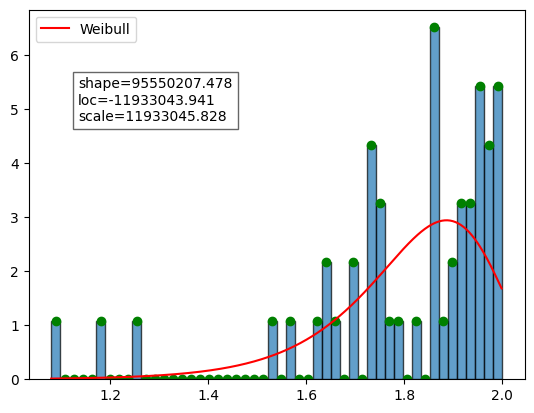

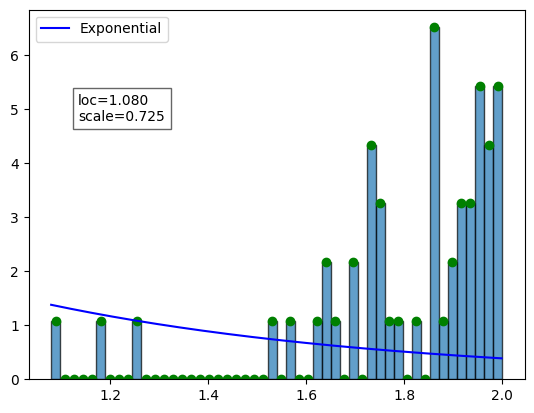

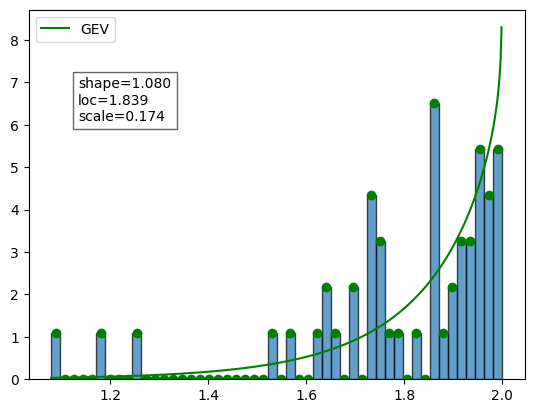

In [7]:
# Weibull
plt.hist(extremes['PET'], bins=bs, density=True, edgecolor='black', alpha=0.7)
plt.scatter(bin_centers, y_obser, color='green')
plt.plot(x_axis2, pdf1, color='red', label='Weibull')
plt.text(0.1,0.7, f'shape={c1:.3f}\nloc={l1:.3f}\nscale={s1:.3f}', transform=plt.gca().transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.6))
plt.legend()
plt.show()

# Exponential
plt.hist(extremes['PET'], bins=bs, density=True, edgecolor='black', alpha=0.7)
plt.scatter(bin_centers, y_obser, color='green')
plt.plot(x_axis, pdf2, color='blue', label='Exponential')
plt.text(0.1,0.7, f'loc={l2:.3f}\nscale={s2:.3f}', transform=plt.gca().transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.6))
plt.legend()
plt.show()

# Generalized Extreme Value
plt.hist(extremes['PET'], bins=bs, density=True, edgecolor='black', alpha=0.7)
plt.scatter(bin_centers, y_obser, color='green')
plt.plot(x_axis, pdf3, color='green', label='GEV')
plt.text(0.1,0.7, f'shape={c3:.3f}\nloc={l3:.3f}\nscale={s3:.3f}', transform=plt.gca().transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.6))
plt.legend()
plt.show()

In [8]:
def r2(y_pred,y_obser):
    mean= y_obser.mean()
    SSr=0
    i=0

    while i<len(y_obser):
        SSr=SSr+(y_obser[i]-y_pred[i])**2
        i=i+1
    SSt=0
    i=0
    while i<len(y_obser):
        SSt=SSt+(y_obser[i]-mean)**2
        i+=1
    rsq=1-(SSr/SSt)
    return print (f"r2= {rsq}")

pdf1= weibull_min.pdf(bin_centers,c1,l1,s1)
pdf2= expon.pdf(bin_centers,l2,s2)
pdf3= genextreme.pdf(bin_centers,c3,l3,s3)
r2(pdf1,y_obser)
r2(pdf2,y_obser)
r2(pdf3,y_obser)


r2= 0.4004800949356303
r2= -0.25639709561359614
r2= 0.5794548541075857


In [9]:
def integrate_trapezoidal(X, Y):
    return np.sum((Y[:-1] + Y[1:]) * np.diff(X)) / 2

# print (1e5)
x=np.linspace(-2, int (1e3), int (1e4))
pdf3= genextreme.pdf(x,c3,l3,s3)
print (f"{integrate_trapezoidal(x,pdf3)*100: .4f}%")



 73.6225%


In [10]:
import math

def fit_gev(x, y, learning_rate=1e-4, max_iter=5000, tol=1e-6):
    """
    Fit GEV parameters (mu, sigma, xi) to (x, y) using MLE and gradient descent.
    
    Parameters:
        x : list, observed values
        y : list, histogram probabilities or counts
        learning_rate : float, step size for gradient descent
        max_iter : int, maximum iterations
        tol : float, convergence tolerance
    
    Returns:
        tuple: (mu, sigma, xi)
    """
    # Normalize y to probabilities
    y_sum = sum(y)
    y = [yi / y_sum for yi in y]
    n = len(x)
    
    # Initialize parameters (robust guesses)
    mu = sum(xi * yi for xi, yi in zip(x, y))  # Weighted mean
    sigma = max(1e-3, math.sqrt(sum(yi * (xi - mu)**2 for xi, yi in zip(x, y)))  # Weighted std, clamped
    xi = 0.0  # Start with Gumbel case (xi=0)
    
    def neg_log_likelihood(mu, sigma, xi):
        sigma = max(1e-6, sigma)  # Ensure sigma > 0
        total = 0.0
        for xi_val, yi in zip(x, y):
            z = (xi_val - mu) / sigma
            if abs(xi) < 1e-6:  # Gumbel case (xi ≈ 0)
                term = math.exp(-z)
                log_p = math.log(sigma) + z + term
            else:
                if 1 + xi * z <= 1e-6:  # Invalid region
                    return 1e10  # Large penalty (instead of inf)
                term = (1 + xi * z) ** (-1/xi)
                log_p = math.log(sigma) + (1 + 1/xi) * math.log(1 + xi * z) + term
            total += yi * log_p
        return -total
    
    # Gradient descent with momentum (for stability)
    prev_mu, prev_sigma, prev_xi = mu, sigma, xi
    momentum_mu, momentum_sigma, momentum_xi = 0.0, 0.0, 0.0
    beta = 0.9  # Momentum factor
    
    for _ in range(max_iter):
        # Compute numerical gradients
        eps = 1e-8
        f = neg_log_likelihood(mu, sigma, xi)
        
        # Gradient for mu
        f_mu_eps = neg_log_likelihood(mu + eps, sigma, xi)
        grad_mu = (f_mu_eps - f) / eps
        
        # Gradient for sigma
        f_sigma_eps = neg_log_likelihood(mu, sigma + eps, xi)
        grad_sigma = (f_sigma_eps - f) / eps
        
        # Gradient for xi
        f_xi_eps = neg_log_likelihood(mu, sigma, xi + eps)
        grad_xi = (f_xi_eps - f) / eps
        
        # Update with momentum
        momentum_mu = beta * momentum_mu + (1 - beta) * grad_mu
        momentum_sigma = beta * momentum_sigma + (1 - beta) * grad_sigma
        momentum_xi = beta * momentum_xi + (1 - beta) * grad_xi
        
        mu -= learning_rate * momentum_mu
        sigma = max(1e-6, sigma - learning_rate * momentum_sigma)  # Clamp sigma
        xi -= learning_rate * momentum_xi
        
        # Check convergence
        if (abs(mu - prev_mu) < tol and 
            abs(sigma - prev_sigma) < tol and 
            abs(xi - prev_xi) < tol):
            break
        prev_mu, prev_sigma, prev_xi = mu, sigma, xi
    
    return mu, sigma, xi

# Example usage
x = [1.0, 2.0, 3.0, 4.0, 5.0]
y = [10, 20, 30, 20, 10]  # Histogram counts
mu, sigma, xi = fit_gev(x, y)
print(f"Fitted GEV parameters: mu={mu:.3f}, sigma={sigma:.3f}, xi={xi:.3f}")

SyntaxError: invalid syntax (245752404.py, line 25)